## 1️⃣ Carga del Dataset

In [1]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("../data/Pokemon.csv")

# Ver las primeras filas
df.head()


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


##  2️⃣ Explorar la Estructura del Dataset

In [5]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [32]:
# Ver las columnas disponibles
print(df.columns)

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


In [31]:
# Revisar valores nulos
df.isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [ ]:
# Estadísticas descriptivas
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [11]:
# Corregimos los valores nulos de la columna "Type2" con none, ya que hay Pokémon que solo tienen 1 tipo.

# Reemplazar valores nulos en Type 2 con 'None'
df['Type 2'].fillna('None', inplace=True)


In [12]:
# Verificar si quedan valores nulos
df['Type 2'].isnull().sum()

np.int64(0)

##  3️⃣ Visualizar algunas Distribuciones

### Distribución de los tipos de Pokémon
✅ ¿Cuáles son los tipos más comunes en Pokémon?

C:\Users\furio\AppData\Local\Temp\ipykernel_4188\831825535.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=all_types, order=all_types.value_counts().index, palette="viridis")


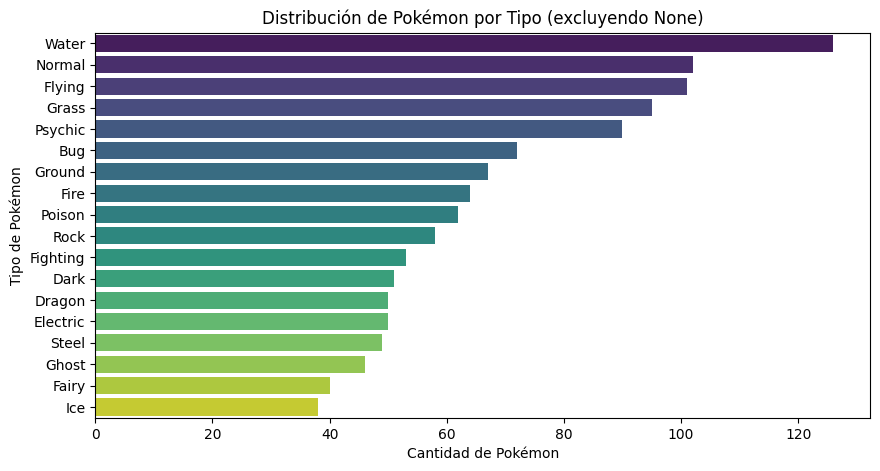

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Unir Type 1 y Type 2 en una sola columna
all_types = pd.concat([df['Type 1'], df['Type 2']], axis=0)

# Eliminar "None" de la lista
all_types = all_types[all_types != "None"]

# Contar la frecuencia de cada tipo sin "None"
plt.figure(figsize=(10, 5))
sns.countplot(y=all_types, order=all_types.value_counts().index, palette="viridis")
plt.xlabel("Cantidad de Pokémon")
plt.ylabel("Tipo de Pokémon")
plt.title("Distribución de Pokémon por Tipo (excluyendo None)")
plt.show()



### Relación entre las Estadísticas y la Popularidad

📌 ¿Qué veremos aquí?

✅ Si los Pokémon legendarios tienen stats mucho más altos.

✅ Si hay una relación entre ataque y defensa.

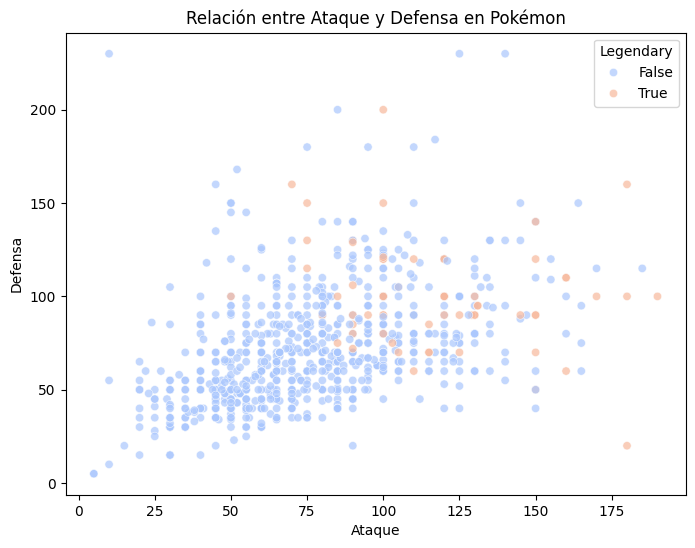

In [4]:
# Comparar el Ataque y la Defensa de los Pokémon
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Attack'], y=df['Defense'], hue=df['Legendary'], palette="coolwarm", alpha=0.7)
plt.xlabel("Ataque")
plt.ylabel("Defensa")
plt.title("Relación entre Ataque y Defensa en Pokémon")
plt.show()


### ¿Los Pokémon legendarios tienen stats significativamente más altos?

📌 ¿Qué veremos aquí?

✅ Si los Pokémon legendarios tienen un total de stats mucho mayor.

✅ Si hay solapamiento entre legendarios y no legendarios.

C:\Users\furio\AppData\Local\Temp\ipykernel_4188\3207659443.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Legendary'], y=df['Total'], palette="coolwarm")


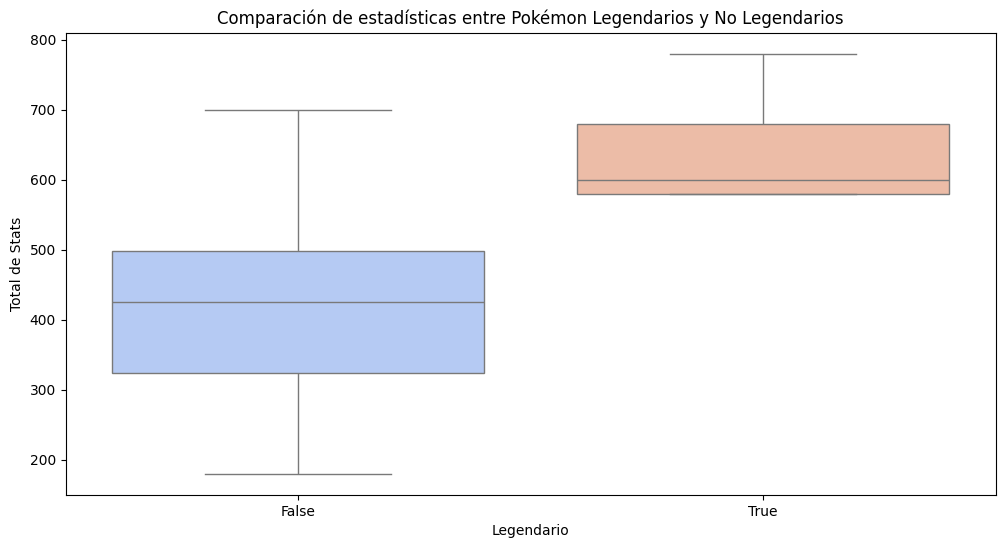

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear boxplots de las estadísticas según si son legendarios o no
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Legendary'], y=df['Total'], palette="coolwarm")
plt.xlabel("Legendario")
plt.ylabel("Total de Stats")
plt.title("Comparación de estadísticas entre Pokémon Legendarios y No Legendarios")
plt.show()


### ¿Qué generaciones tienen más Pokémon legendarios?

📌 ¿Qué veremos aquí?

✅ Si hay generaciones con muchos más Pokémon legendarios que otras.

✅ Cómo ha evolucionado el diseño de Pokémon a lo largo del tiempo.

C:\Users\furio\AppData\Local\Temp\ipykernel_4188\428953354.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[df['Legendary'] == True]['Generation'], palette="magma")


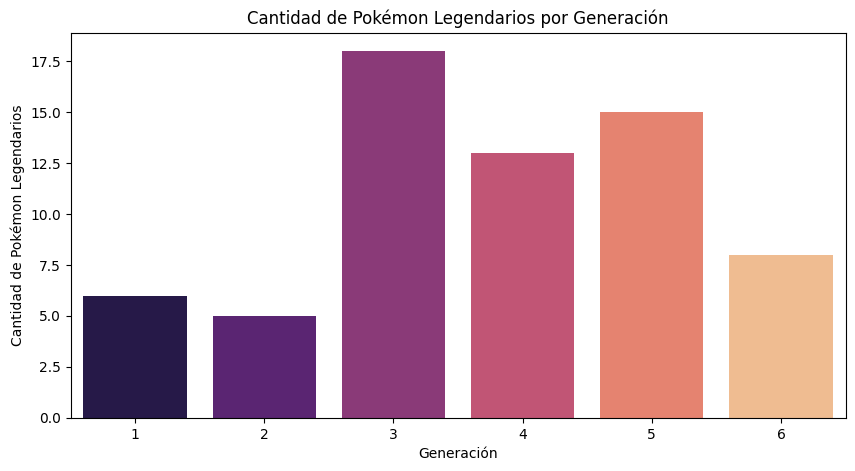

In [18]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df[df['Legendary'] == True]['Generation'], palette="magma")
plt.xlabel("Generación")
plt.ylabel("Cantidad de Pokémon Legendarios")
plt.title("Cantidad de Pokémon Legendarios por Generación")
plt.show()


### ¿Cómo se distribuyen las estadísticas según el tipo de Pokémon?

📌 ¿Qué veremos aquí?

✅ Si ciertos tipos (como Dragón o Lucha) tienen mayor ataque en promedio.

✅ Qué tipos tienen menos poder ofensivo (Ej: Normal, Bicho, etc.).

C:\Users\furio\AppData\Local\Temp\ipykernel_4188\2757807860.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attack_avg.index, y=attack_avg.values, palette="coolwarm")


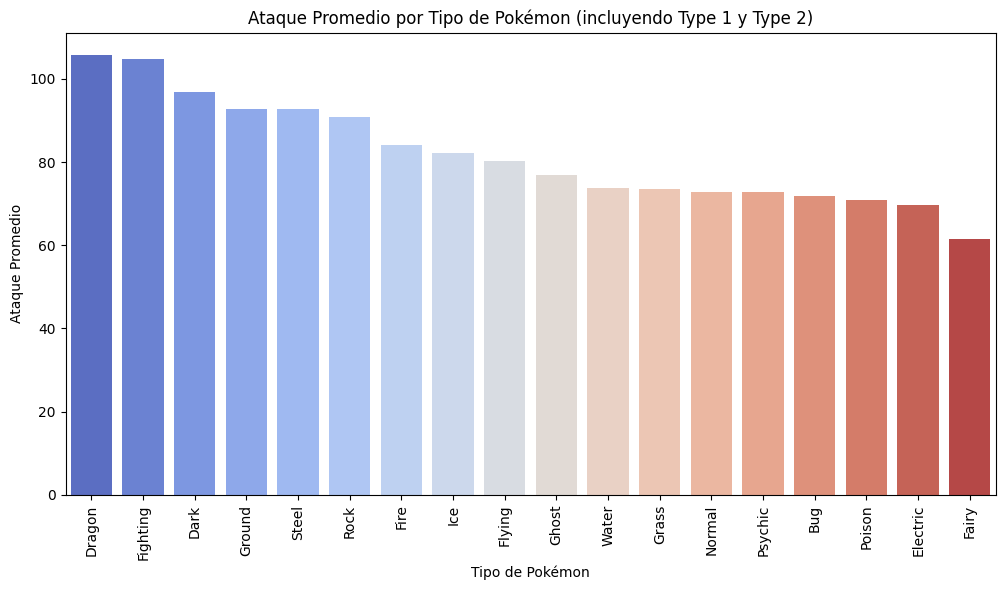

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Unir Type 1 y Type 2 en una sola columna
all_types = pd.concat([df[['Type 1', 'Attack']].rename(columns={'Type 1': 'Type'}),
                       df[['Type 2', 'Attack']].rename(columns={'Type 2': 'Type'})])

# Excluir "None" del análisis
all_types = all_types[all_types['Type'] != "None"]

# Calcular ataque promedio por tipo
attack_avg = all_types.groupby("Type")["Attack"].mean().sort_values(ascending=False)

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(x=attack_avg.index, y=attack_avg.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Tipo de Pokémon")
plt.ylabel("Ataque Promedio")
plt.title("Ataque Promedio por Tipo de Pokémon (incluyendo Type 1 y Type 2)")
plt.show()


C:\Users\furio\AppData\Local\Temp\ipykernel_4188\3044287874.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attack_avg.index, y=attack_avg.values, palette="coolwarm")


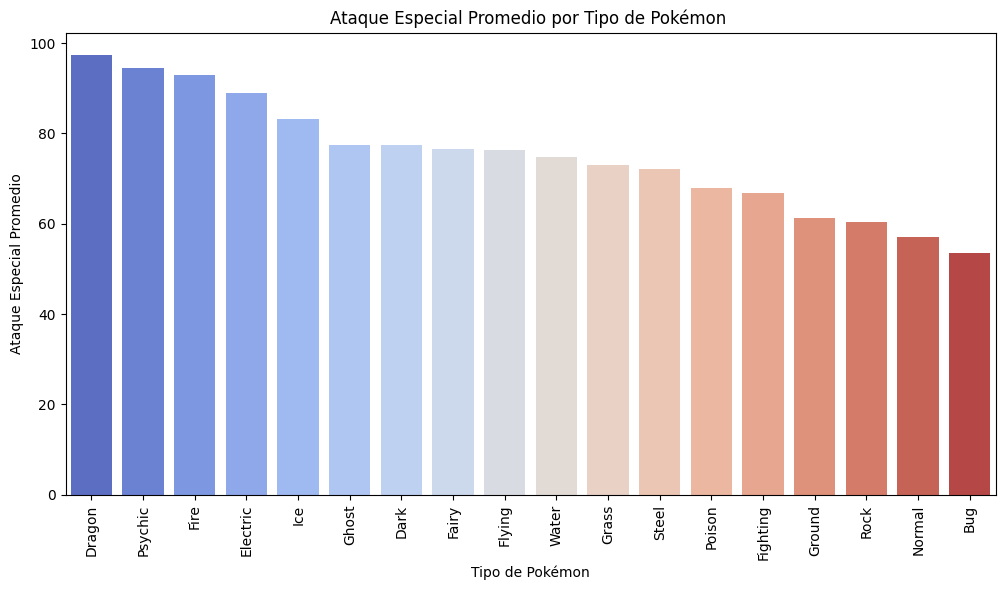

In [25]:
# Unir Type 1 y Type 2 en una sola columna
all_types = pd.concat([df[['Type 1', 'Sp. Atk']].rename(columns={'Type 1': 'Type'}),
                       df[['Type 2', 'Sp. Atk']].rename(columns={'Type 2': 'Type'})])

# Excluir "None" del análisis
all_types = all_types[all_types['Type'] != "None"]

# Calcular ataque promedio por tipo
attack_avg = all_types.groupby("Type")["Sp. Atk"].mean().sort_values(ascending=False)

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(x=attack_avg.index, y=attack_avg.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Tipo de Pokémon")
plt.ylabel("Ataque Especial Promedio")
plt.title("Ataque Especial Promedio por Tipo de Pokémon ")
plt.show()

C:\Users\furio\AppData\Local\Temp\ipykernel_4188\205469309.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attack_avg.index, y=attack_avg.values, palette="coolwarm")


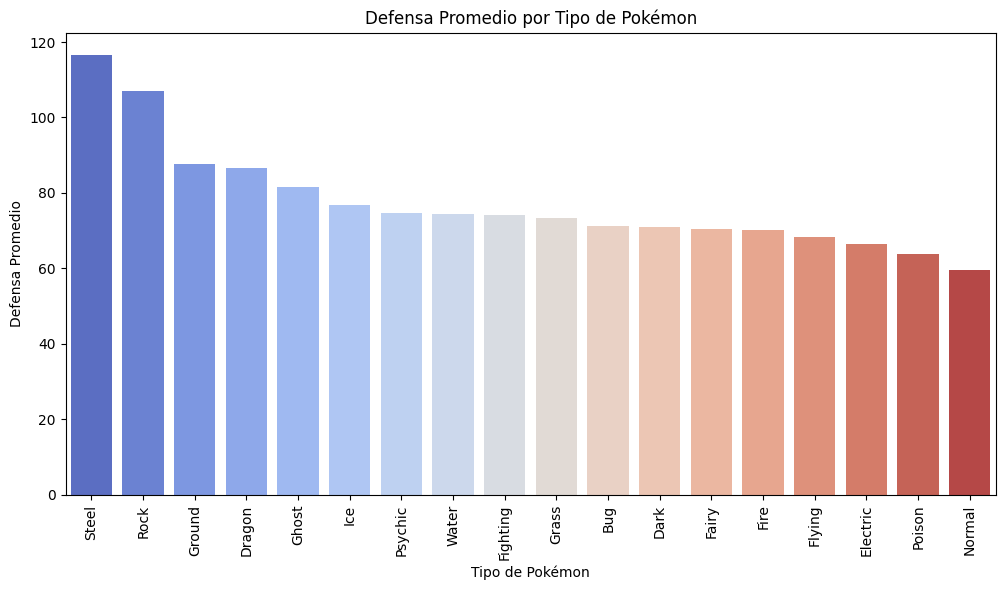

In [26]:
# Unir Type 1 y Type 2 en una sola columna
all_types = pd.concat([df[['Type 1', 'Defense']].rename(columns={'Type 1': 'Type'}),
                       df[['Type 2', 'Defense']].rename(columns={'Type 2': 'Type'})])

# Excluir "None" del análisis
all_types = all_types[all_types['Type'] != "None"]

# Calcular ataque promedio por tipo
attack_avg = all_types.groupby("Type")["Defense"].mean().sort_values(ascending=False)

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(x=attack_avg.index, y=attack_avg.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Tipo de Pokémon")
plt.ylabel("Defensa Promedio")
plt.title("Defensa Promedio por Tipo de Pokémon")
plt.show()

C:\Users\furio\AppData\Local\Temp\ipykernel_4188\3006893068.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attack_avg.index, y=attack_avg.values, palette="coolwarm")


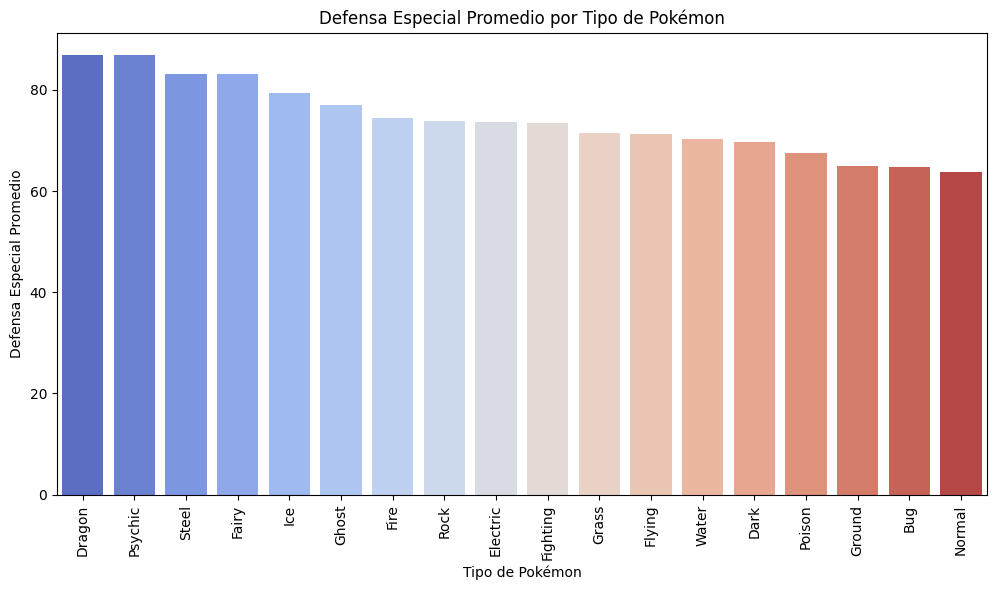

In [29]:
# Unir Type 1 y Type 2 en una sola columna
all_types = pd.concat([df[['Type 1', 'Sp. Def']].rename(columns={'Type 1': 'Type'}),
                       df[['Type 2', 'Sp. Def']].rename(columns={'Type 2': 'Type'})])

# Excluir "None" del análisis
all_types = all_types[all_types['Type'] != "None"]

# Calcular ataque promedio por tipo
attack_avg = all_types.groupby("Type")["Sp. Def"].mean().sort_values(ascending=False)

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(x=attack_avg.index, y=attack_avg.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Tipo de Pokémon")
plt.ylabel("Defensa Especial Promedio")
plt.title("Defensa Especial Promedio por Tipo de Pokémon")
plt.show()

C:\Users\furio\AppData\Local\Temp\ipykernel_4188\4051313423.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attack_avg.index, y=attack_avg.values, palette="coolwarm")


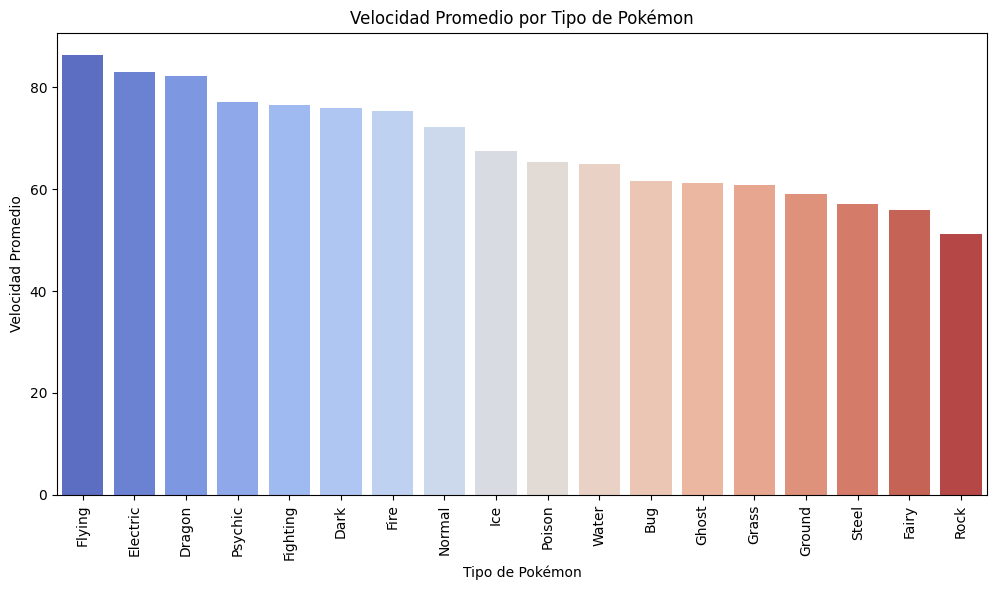

In [30]:
# Unir Type 1 y Type 2 en una sola columna
all_types = pd.concat([df[['Type 1', 'Speed']].rename(columns={'Type 1': 'Type'}),
                       df[['Type 2', 'Speed']].rename(columns={'Type 2': 'Type'})])

# Excluir "None" del análisis
all_types = all_types[all_types['Type'] != "None"]

# Calcular ataque promedio por tipo
attack_avg = all_types.groupby("Type")["Speed"].mean().sort_values(ascending=False)

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(x=attack_avg.index, y=attack_avg.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Tipo de Pokémon")
plt.ylabel("Velocidad Promedio")
plt.title("Velocidad Promedio por Tipo de Pokémon")
plt.show()

C:\Users\furio\AppData\Local\Temp\ipykernel_4188\2553971515.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attack_avg.index, y=attack_avg.values, palette="coolwarm")


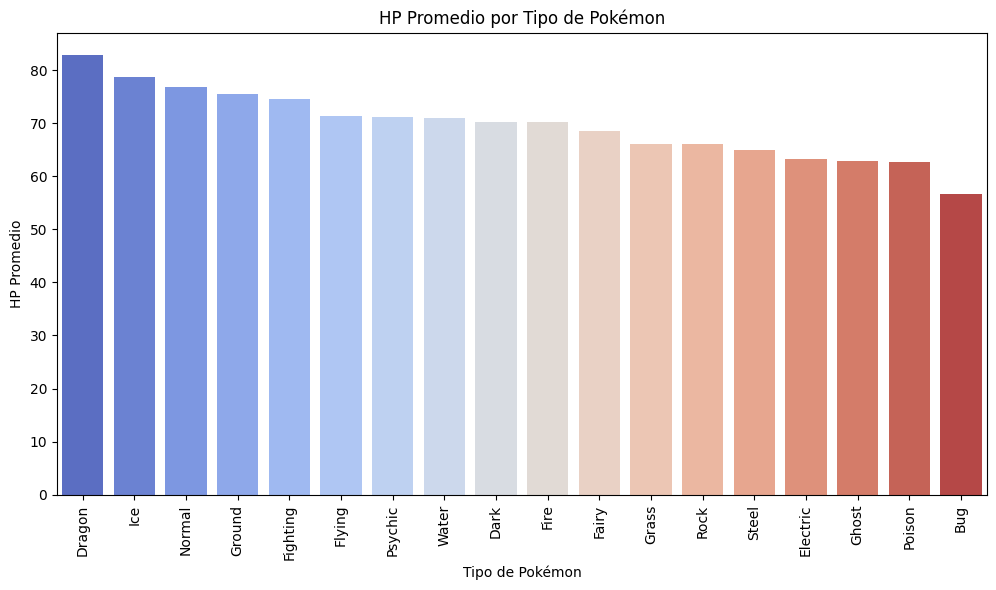

In [33]:
# Unir Type 1 y Type 2 en una sola columna
all_types = pd.concat([df[['Type 1', 'HP']].rename(columns={'Type 1': 'Type'}),
                       df[['Type 2', 'HP']].rename(columns={'Type 2': 'Type'})])

# Excluir "None" del análisis
all_types = all_types[all_types['Type'] != "None"]

# Calcular ataque promedio por tipo
attack_avg = all_types.groupby("Type")["HP"].mean().sort_values(ascending=False)

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(x=attack_avg.index, y=attack_avg.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Tipo de Pokémon")
plt.ylabel("HP Promedio")
plt.title("HP Promedio por Tipo de Pokémon")
plt.show()